<a href="https://colab.research.google.com/github/NickChip19/Practice/blob/main/Machine_Learning_FinalDS201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Model(Binary Classification)

Credit risk classification – whether the client is evaluated to be in the good risk category vs. bad risk category.

0 = Good
1 = Bad

Import Data From Drive

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
import pandas as pd
import os


# Visualisation Libraries
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# ML Algorithm & Metrics Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
# from sklearn.linear_model import Lasso, Ridge
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC



In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
dataset=pd.read_csv('gdrive/My Drive/germancode.csv')

Mounted at /content/gdrive


Dataset Analysis

Split target variable and explanatory variables

In [ ]:

y = dataset.iloc[:,20]
X = dataset.iloc[:,:20]


In [ ]:
list(dataset.keys())

['Status of existing checking account',
 'Duration in month',
 'Credit history',
 'Purpose',
 'Credit amount',
 'Savings account/bonds',
 'Present employment since',
 'Installment rate in percentage of disposable income',
 'Personal status and sex',
 'Other debtors / guarantors',
 'Present residence since',
 'Property',
 'Age in years',
 'Other installment plans',
 'Housing',
 'Number of existing credits at this bank',
 'Job',
 'Number of people being liable to provide maintenance for',
 'Telephone',
 'foreign worker',
 'risk']

In [ ]:
dataset.describe()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,16.143000,3.54500,3.828000,3271.258000,2.105000,2.384000,2.973000,2.68200,0.145000,...,2.358000,30.646000,2.675000,1.929000,1.407000,1.904000,1.155000,0.404000,0.963000,0.300000
std,1.257638,13.610062,1.08312,2.744439,2822.736876,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,16.929835,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,1.000000,1.00000,1.000000,250.000000,1.000000,0.000000,1.000000,1.00000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,3.00000,2.000000,1365.500000,1.000000,2.000000,2.000000,2.00000,0.000000,...,1.000000,26.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,12.000000,3.00000,3.000000,2319.500000,1.000000,2.000000,3.000000,3.00000,0.000000,...,2.000000,31.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000
75%,4.000000,18.000000,5.00000,4.000000,3972.250000,3.000000,4.000000,4.000000,3.00000,0.000000,...,3.000000,39.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,72.000000,5.00000,11.000000,18424.000000,5.000000,4.000000,4.000000,4.00000,2.000000,...,4.000000,75.000000,3.000000,3.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,risk
0,1,6,5,4,1169,5,4,4,3,0,...,1,67,3,2,2,2,1,1,1,0
1,2,48,3,4,5951,1,2,2,2,0,...,1,2,3,2,1,2,1,0,1,1
2,4,12,5,7,2096,1,3,2,3,0,...,1,49,3,2,1,1,2,0,1,0
3,1,2,3,3,7882,1,3,2,3,2,...,2,45,3,3,1,2,2,0,1,0
4,1,4,4,1,4870,1,2,3,3,0,...,4,53,3,3,2,2,2,0,1,1


Split Data into Training and Testing set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print("Shape of  X training set: " + str(X_train.shape))
print("Shape of X test set: " + str(X_test.shape))

print("Shape of  y training set: " + str(y_train.shape))
print("Shape of y test set: " + str(y_test.shape))

Shape of  X training set: (700, 20)
Shape of X test set: (300, 20)
Shape of  y training set: (700,)
Shape of y test set: (300,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


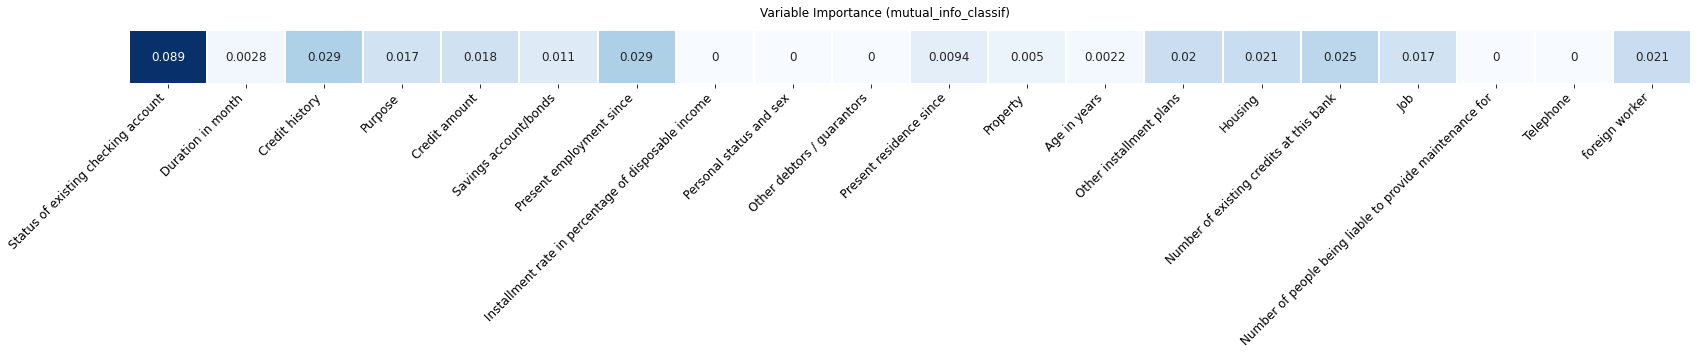

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(28, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 12})
plt.yticks([], [])
plt.gca().set_xticklabels(X.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=12, y=1.2)
plt.gcf().subplots_adjust(wspace=0.4)

Use the most important variables in training set for Binary Classification Models

In [ ]:
X_use = dataset[['Status of existing checking account','Duration in month','Credit history','Credit amount','Savings account/bonds','Age in years','Other installment plans']]
# split into training & test data
Xuse_train, Xuse_test, y_train, y_test = train_test_split(X_use, y, test_size=0.30, random_state=0)
# standardise input
Xuse_train = scaler.fit_transform(Xuse_train)
Xuse_test = scaler.transform(Xuse_test)

#***Training Model***

In [ ]:
def train_model(model,color):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], Xuse_train, y_train, cv=None)
    cm = confusion_matrix(y_train, y_train_pred)
    print('Confusion matrix: ' + model[0])
    print(cm)
    print()
    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred)
    recall = recall_score(y_train, y_train_pred)
    f1 = f1_score(y_train, y_train_pred)

    df_model = [accuracy, precision, recall, f1]
    df= pd.DataFrame(df_model,index=['Accuracy','Precision','Recall','F1 score'])
    ax = df.plot.bar(rot=0,color=[color])

    print(f'{model[0]} Accuracy: {accuracy}')
    print(f'{model[0]} Precision: {precision}')
    print(f'{model[0]} Recall: {recall}')
    print(f'{model[0]} f1 - score: {f1}')
    

 Random Forest Classifier

Confusion matrix: Random Forest
[[430  56]
 [123  91]]

Random Forest Accuracy: 0.7442857142857143
Random Forest Precision: 0.6190476190476191
Random Forest Recall: 0.4252336448598131
Random Forest f1 - score: 0.5041551246537397


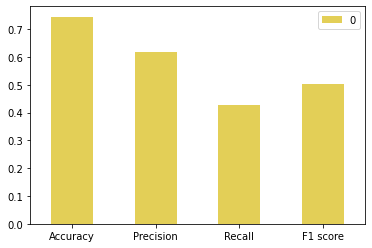

In [ ]:
RF_Model= train_model(('Random Forest', RandomForestClassifier(n_estimators=100,random_state=0, min_samples_split=2,verbose=0)),'#E3CF57')

Gaussian Naive Bayes

Confusion matrix: Gaussian Naive Bayes
[[419  67]
 [116  98]]

Gaussian Naive Bayes Accuracy: 0.7385714285714285
Gaussian Naive Bayes Precision: 0.593939393939394
Gaussian Naive Bayes Recall: 0.45794392523364486
Gaussian Naive Bayes f1 - score: 0.5171503957783641


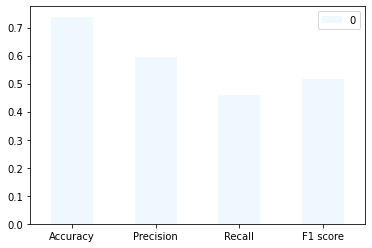

In [ ]:
GVB_Model= train_model(('Gaussian Naive Bayes', GaussianNB()),'#F0F8FF')

Logistic Regression

Confusion matrix: Logistic Regression
[[428  58]
 [124  90]]

Logistic Regression Accuracy: 0.74
Logistic Regression Precision: 0.6081081081081081
Logistic Regression Recall: 0.4205607476635514
Logistic Regression f1 - score: 0.4972375690607735


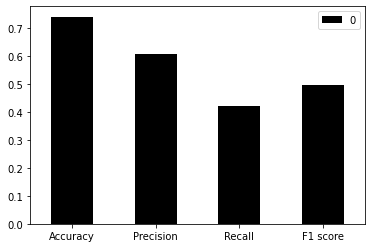

In [ ]:
LR_Model= train_model(('Logistic Regression',LogisticRegression()),'#000000')

Decision Tree Classifier

Confusion matrix: Decision Tree Classifier
[[366 120]
 [119  95]]

Decision Tree Classifier Accuracy: 0.6585714285714286
Decision Tree Classifier Precision: 0.4418604651162791
Decision Tree Classifier Recall: 0.4439252336448598
Decision Tree Classifier f1 - score: 0.4428904428904429


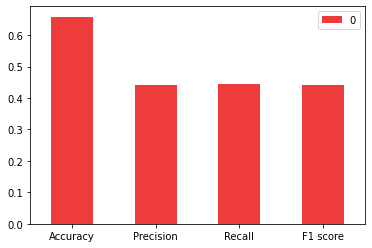

In [ ]:
DCT_Model= train_model(('Decision Tree Classifier',DecisionTreeClassifier(criterion='gini',random_state=21)),'#EE3B3B')

Support Vector Machine

Confusion matrix: Support Vector Machines
[[452  34]
 [151  63]]

Support Vector Machines Accuracy: 0.7357142857142858
Support Vector Machines Precision: 0.6494845360824743
Support Vector Machines Recall: 0.29439252336448596
Support Vector Machines f1 - score: 0.40514469453376206


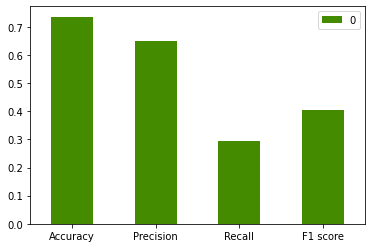

In [ ]:
SVM_Model= train_model(('Support Vector Machines',SVC(kernel='rbf')),'#458B00')

K Neighbors Classifier

Confusion matrix: K-Nearest Neighbor
[[417  69]
 [151  63]]

K-Nearest Neighbor Accuracy: 0.6857142857142857
K-Nearest Neighbor Precision: 0.4772727272727273
K-Nearest Neighbor Recall: 0.29439252336448596
K-Nearest Neighbor f1 - score: 0.36416184971098264


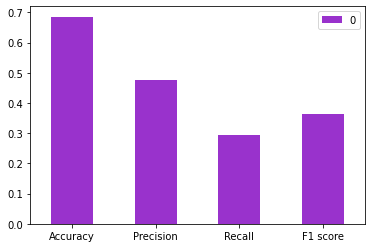

In [ ]:
K_Model= train_model(('K-Nearest Neighbor',KNeighborsClassifier()),'#9932CC')

Gradient Boosting Classifier

Confusion matrix: Gradient Boosting
[[429  57]
 [117  97]]

Gradient Boosting Accuracy: 0.7514285714285714
Gradient Boosting Precision: 0.6298701298701299
Gradient Boosting Recall: 0.4532710280373832
Gradient Boosting f1 - score: 0.5271739130434783


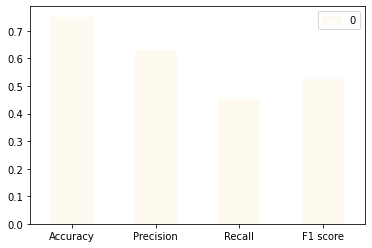

In [ ]:
GBC_model=train_model(('Gradient Boosting',GradientBoostingClassifier()),'#FFFAF0')